In [155]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
db = pd.read_csv('Diabetes.csv')

In [3]:
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
x = db.iloc[:,0:8]
y = db.iloc[:,8]

In [5]:
db.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2022)

In [7]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_auc_score

In [8]:
nb=BernoulliNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
print(roc_auc_score(y_test,y_pred))

0.5


# Q2

In [9]:
iris = pd.read_csv('Iris.csv')

In [10]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
iris.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [13]:
iris.drop(columns='Id',inplace=True)

In [14]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [17]:
g= GaussianNB()

In [18]:
g.fit(X_train,y_train)

GaussianNB()

In [19]:
y_pred = g.predict(X_test)

In [20]:
acc=accuracy_score(y_test,y_pred)

In [21]:
acc

1.0

In [22]:
dt = DecisionTreeClassifier()

In [23]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
y_pred = dt.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test,y_pred)

accuracy 

In [26]:
from sklearn.tree import plot_tree

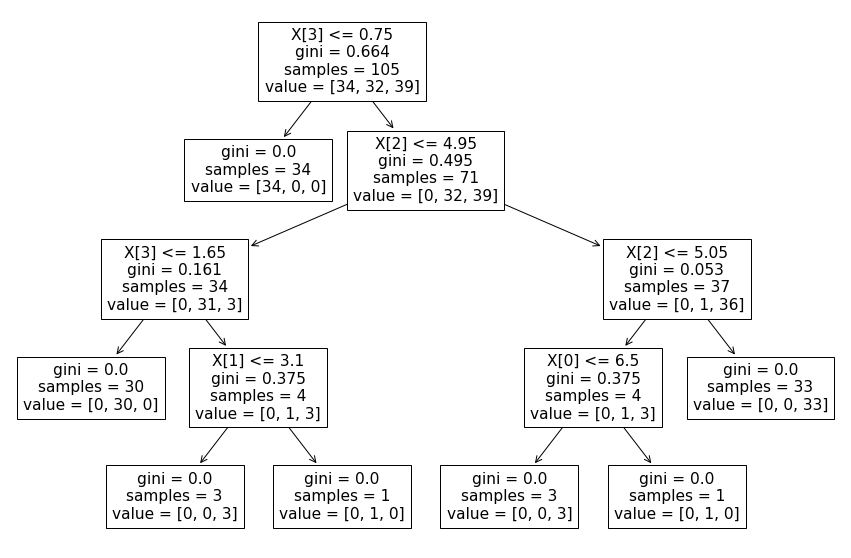

In [29]:
plt.figure(figsize=(15,10))
plot_tree(dt.fit(X_train,y_train))
plt.show()

As we can see the best accuracy score is given by the Gaussian Naive Bayes as 100% where the Decision Tree give 97% accuracy/.


# Q3

In [30]:
BC = pd.read_csv('BreastCancer.csv')

In [31]:
BC.head()

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,Benign
1,63375,9,1,2,6,4,10,7,7,2,Malignant
2,76389,10,4,7,2,2,8,6,1,1,Malignant
3,95719,6,10,10,10,8,10,7,10,7,Malignant
4,128059,1,1,1,1,2,5,5,1,1,Benign


In [32]:
BC_dum = pd.get_dummies(BC,drop_first=True)

In [33]:
x=BC_dum.drop(['Code','Class_Malignant'],axis=1)

In [34]:
y = BC_dum['Class_Malignant']

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2022)

In [36]:
g=GaussianNB()
g.fit(x_train,y_train)

GaussianNB()

In [37]:
y_pred = g.predict(x_test)

In [38]:
accuracyscore = accuracy_score(y_test,y_pred)

In [39]:
accuracyscore

0.9928571428571429

# Q4

In [40]:
titanic = pd.read_csv('titanic.csv')

In [41]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [42]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [43]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
titanic.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
deck        688
dtype: int64

In [45]:
titanic['sex'] = titanic['sex'].map({'female':0, 'male':1}).astype(int)

In [46]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int32  
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 59.3+ KB


In [47]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [48]:
titanic['embarked'] = titanic['embarked'].map({'S':0,'C':1,'Q':2})

In [49]:
titanic.drop(['deck'],axis=1,inplace=True)

In [50]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0


In [51]:
titanic.shape

(891, 8)

In [52]:
titanic['age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: age, Length: 714, dtype: float64

In [53]:
titanic['embarked'].dropna()

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
886    0.0
887    0.0
888    0.0
889    1.0
890    2.0
Name: embarked, Length: 889, dtype: float64

In [54]:
titanic.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,0.0
1,1,1,0,38.0,1,0,71.2833,1.0
2,1,3,0,26.0,0,0,7.9250,0.0
3,1,1,0,35.0,1,0,53.1000,0.0
4,0,3,1,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,2.0
886,0,2,1,27.0,0,0,13.0000,0.0
887,1,1,0,19.0,0,0,30.0000,0.0
889,1,1,1,26.0,0,0,30.0000,1.0


In [55]:
titanic.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [56]:
titanic['age'].mean()

29.69911764705882

In [57]:
titanic['embarked'].mean()

0.36220472440944884

In [58]:
titanic['age'].replace(np.NAN,titanic['age'].mean(),inplace=True)

In [59]:
titanic['embarked'].replace(np.NAN,titanic['embarked'].mean(),inplace=True)

In [60]:
titanic.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [61]:
x=titanic.iloc[:,0:4].values
y=titanic.iloc[:,4].values

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2022)

In [63]:
g= GaussianNB()

In [64]:
g.fit(x_train,y_train)

GaussianNB()

In [65]:
y_pred = g.predict(x_test)

In [66]:
accu = accuracy_score(y_test,y_pred)

In [67]:
accu

0.41899441340782123

In [68]:
des = DecisionTreeClassifier()

In [69]:
des.fit(x_train,y_train)

DecisionTreeClassifier()

In [70]:
y_pred1 = des.predict(x_test)

In [71]:
ac = accuracy_score(y_test,y_pred)

In [72]:
ac

0.41899441340782123

# Q5

In [119]:
weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy','Sunny','Overcast','Overcast','Rainy']
temp = ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
play = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [120]:
dict1 = {'weather' :weather , 'temp': temp , 'play':play}

In [121]:
dict1

{'weather': ['Sunny',
  'Sunny',
  'Overcast',
  'Rainy',
  'Rainy',
  'Rainy',
  'Overcast',
  'Sunny',
  'Sunny',
  'Rainy',
  'Sunny',
  'Overcast',
  'Overcast',
  'Rainy'],
 'temp': ['Hot',
  'Hot',
  'Hot',
  'Mild',
  'Cool',
  'Cool',
  'Cool',
  'Mild',
  'Cool',
  'Mild',
  'Mild',
  'Mild',
  'Hot',
  'Mild'],
 'play': ['No',
  'No',
  'Yes',
  'Yes',
  'Yes',
  'No',
  'Yes',
  'No',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'Yes',
  'No']}

In [122]:
tennis = pd.DataFrame(dict1)

In [123]:
tennis

,weather,temp,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
5,Rainy,Cool,No
6,Overcast,Cool,Yes
7,Sunny,Mild,No
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes


In [124]:
tennis['weather'].value_counts()

Sunny       5
Rainy       5
Overcast    4
Name: weather, dtype: int64

In [125]:
tennis['temp'].value_counts()

Mild    6
Hot     4
Cool    4
Name: temp, dtype: int64

In [126]:
tennis['weather'] = tennis['weather'].map({'Sunny':0 , 'Rainy':1, 'Overcast':2})
tennis['temp'] = tennis['temp'].map({'Mild':0, 'Hot':1 , 'Cool':2})
tennis['play'] = tennis['play'].map({'Yes':1 , 'No':0})

In [127]:
tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   weather  14 non-null     int64
 1   temp     14 non-null     int64
 2   play     14 non-null     int64
dtypes: int64(3)
memory usage: 464.0 bytes


In [128]:
tennis

,weather,temp,play
0,0,1,0
1,0,1,0
2,2,1,1
3,1,0,1
4,1,2,1
5,1,2,0
6,2,2,1
7,0,0,0
8,0,2,1
9,1,0,1


In [130]:
d = tennis.drop(['play'],axis=1)

In [131]:
e = tennis['play']

In [132]:
d

,weather,temp
0,0,1
1,0,1
2,2,1
3,1,0
4,1,2
5,1,2
6,2,2
7,0,0
8,0,2
9,1,0


In [133]:
e

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64

In [134]:
d_train, d_test,e_train,e_test = train_test_split(d,e,test_size=0.2,random_state=0)

In [135]:
d_train.shape

(11, 2)

In [136]:
d_test.shape

(3, 2)

In [137]:
from sklearn.naive_bayes import MultinomialNB

In [138]:
mb = MultinomialNB()

In [139]:
mb.fit(d_train,e_train)

MultinomialNB()

In [140]:
mb.feature_count_

array([[2., 4.],
       [8., 2.]])

In [141]:
score = mb.score(d_train,e_train)

In [142]:
e_pred = mb.predict(d_test)

In [144]:
print(metrics.classification_report(e_test, e_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       3.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



C:\Users\kashy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kashy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kashy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kashy\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [145]:
mb.classes_

array([0, 1], dtype=int64)

In [146]:
predicted = score*100

In [147]:
print('The play will continue with',predicted,'%')

The play will continue with 81.81818181818183 %


# Q6

In [150]:
sal = pd.read_csv('Salary_data.xls')

In [151]:
sal

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [152]:
sal.shape

(30, 2)

In [153]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


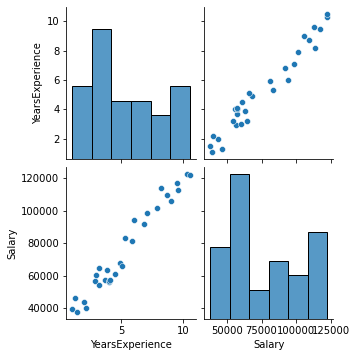

In [156]:
sns.pairplot(sal)

In [157]:
corr = sal.corr()

<AxesSubplot:>

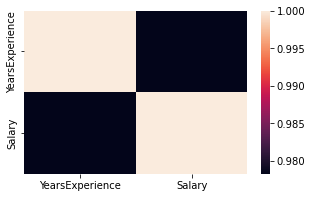

In [158]:
fig=plt.figure(figsize=(5,3))
sns.heatmap(corr)

In [160]:
f= sal.drop('Salary',axis=1)
gb = sal['Salary']

In [161]:
f_train,f_test,gb_train,gb_test = train_test_split(f,gb,test_size=0.2,random_state=0)

In [162]:
from sklearn.linear_model import LinearRegression

In [163]:
lr = LinearRegression()

In [164]:
lr.fit(f_train,gb_train)

LinearRegression()

In [166]:
gb_pred = lr.predict(f_test)

In [167]:
lr.intercept_

26780.09915062818

In [168]:
lr.coef_

array([9312.57512673])

In [169]:
gb_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [170]:
diff = gb_test - gb_pred
pd.DataFrame(np.c_[gb_test,gb_pred,diff],columns=['actual','predicted','difference'])

,actual,predicted,difference
0,37731.0,40748.961841,-3017.961841
1,122391.0,122699.622956,-308.622956
2,57081.0,64961.657170,-7880.657170
3,63218.0,63099.142145,118.857855
4,116969.0,115249.562855,1719.437145
5,109431.0,107799.502753,1631.497247


In [171]:
lr.score(f_test,gb_test)

0.988169515729126

In [172]:
rmse = np.sqrt(metrics.mean_squared_error(f_test,gb_pred))

In [173]:
r2_score = metrics.r2_score(f_test,gb_pred)

In [175]:
rmse ,r2_score

(91115.90482601912, -758953508.5010419)

In [181]:
exp = 5
lr.predict([[exp]])[0]
print(f'Salary of 5years of exp emp = {int(lr.predict([[exp]])[0])} Thousands')

Salary of 5years of exp emp = 73342 Thousands


C:\Users\kashy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\kashy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
